## Decision Tree for Spam 
### (make sure to have run featurize_spam.py)

In [21]:
import numpy as np
np.random.seed(1)

import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from decisiontree import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spam_path = "datasets/spam-dataset/spam_data.mat"
data = scipy.io.loadmat(spam_path)
x = data["training_data"]
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=0.1)
pca_fit = pca.fit(x)
x = pca_fit.transform(x)
y = np.squeeze(data["training_labels"])
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
x_test = pca_fit.transform(data["test_data"])
x.shape,y.shape,x_test.shape

((3336, 4), (3336,), (5857, 4))

In [3]:
%%time
dt = DecisionTree(max_depth=5,header="spam_decisiontree")
dt.fit(x_train, y_train)

CPU times: user 26.1 s, sys: 121 ms, total: 26.3 s
Wall time: 25.7 s


In [4]:
%%time
train_preds = dt.predict(x_train,"train")
print("training accuracy:",np.mean(train_preds==y_train))
val_preds = dt.predict(x_val,"val")
print("validation accuracy:",np.mean(val_preds==y_val))
dt.predict(x_test,"test")

training accuracy: 0.8024737631184408
validation accuracy: 0.7679640718562875
saved predictions
CPU times: user 83 ms, sys: 2.52 ms, total: 85.5 ms
Wall time: 85.4 ms


In [28]:
spam_ex, ham_ex = 0, 3330
print(x[spam_ex,:])
print(x[ham_ex,:])      
#compare these values to csv file to find original feature names
print(pca.components_[:,:10])

[ 0.74230434  0.36332807 -0.26175289 -0.68227287]
[ 0.29276416 -1.3366646   2.19376482  1.44083043]
[[ 0.0580845   0.03290297  0.11068428  0.10132154  0.14326055  0.10786764
   0.05709394  0.07685877  0.10762476  0.13951499]
 [-0.01093026  0.02112622  0.0370875   0.02724811  0.06467807  0.04989163
   0.01995069  0.02913266  0.02971837  0.08542487]
 [-0.04849529 -0.12604642 -0.11396102 -0.09335385 -0.15598889 -0.09255568
  -0.12256773 -0.09831799 -0.08049307 -0.05109376]
 [-0.02349031 -0.1201852  -0.01062051 -0.05757403 -0.0224421   0.02003524
   0.0599332   0.00714026  0.01137459  0.0066579 ]]


In [6]:
dt.print_tree()

Depth 0: feature # 1 > -0.7780129071706656


Depth 1: feature # 0 > 2.6189832383004514
Depth 1: feature # 2 > 0.9921342449684696


Depth 2: feature # 2 > 3.949073938824735
Depth 2: feature # 0 > -3.161120498538386
Depth 2: 0
Depth 2: feature # 0 > -0.7690328621550679


Depth 3: 1
Depth 3: feature # 3 > -2.9930528367786953
Depth 3: feature # 2 > 0.9073762092553337
Depth 3: 0
Depth 3: feature # 2 > -0.05866680006281934
Depth 3: feature # 1 > -1.9683429838272546


Depth 4: feature # 1 > 3.9852817301579764
Depth 4: 1
Depth 4: feature # 3 > -1.6476489326418253
Depth 4: feature # 0 > -1.0477664390728805
Depth 4: 0
Depth 4: 1
Depth 4: feature # 1 > -1.9539107909544002
Depth 4: 1


Depth 5: 0
Depth 5: 0
Depth 5: 0
Depth 5: 1
Depth 5: 0
Depth 5: 1
Depth 5: 1
Depth 5: 0




In [7]:
%%time
val_accs = []
for i in range(40):
    dt = DecisionTree(max_depth=i,header="spam_decisiontree")
    dt.fit(x_train, y_train)
    val_preds = dt.predict(x_val,"val")
    val_accs.append(np.mean(val_preds==y_val))
    if i % 5 == 0:
        print("finished predicting with depth",i)

finished predicting with depth 0
finished predicting with depth 5
finished predicting with depth 10
finished predicting with depth 15
finished predicting with depth 20
finished predicting with depth 25
finished predicting with depth 30
finished predicting with depth 35
CPU times: user 19min 29s, sys: 6.02 s, total: 19min 35s
Wall time: 19min 51s


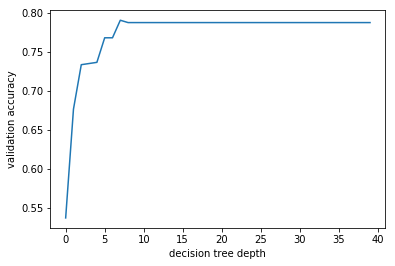

In [8]:
plt.xlabel("decision tree depth")
plt.ylabel('validation accuracy')
plt.plot([i for i in range(len(val_accs))], val_accs);

In [29]:
print(np.argmax(val_accs))

7
